In [1]:
from phomo import Mosaic, Master, Pool

/home/lcoyle/.cache/pypoetry/virtualenvs/phomo-pX3Qwu7w-py3.11/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pool = Pool.from_dir("faces/", crop_ratio=1, tile_size=(20, 20))

Loading tiles: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 9780/9780 [00:04<00:00, 2147.29it/s]


In [3]:
from random import sample
from pathlib import Path

master_file = sample(list(Path("faces").glob('*')), 1)[0]

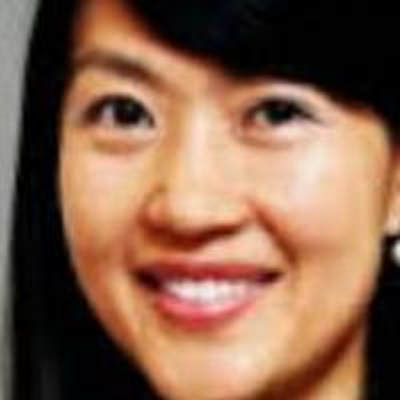

In [4]:
master = Master.from_file(master_file, img_size=(400, 400))
master.img

In [5]:
mosaic = Mosaic(master, pool)

# Serial computation

In [6]:
%time mosaic.build();

Building distance matrix: 100%|██████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:14<00:00, 28.22it/s]


dmatrix (400, 9780)


Building mosaic: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 223368.61it/s]

CPU times: user 7.66 s, sys: 6.71 s, total: 14.4 s
Wall time: 14.4 s


# Multiple cores
Using multple cores somewhat breaks the tqdm progress bar.

In [7]:
%time mosaic.build(workers=2);

Building distance matrix: 100%|██████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:07<00:00, 50.66it/s]


dmatrix (400, 9780)


Building mosaic: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 188550.42it/s]

CPU times: user 260 ms, sys: 66.8 ms, total: 327 ms
Wall time: 8.14 s


In [8]:
%time mosaic.build(workers=4);

Building distance matrix: 100%|██████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:06<00:00, 59.49it/s]


dmatrix (400, 9780)


Building mosaic: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 184344.75it/s]

CPU times: user 277 ms, sys: 108 ms, total: 385 ms
Wall time: 6.99 s


In [9]:
%time mosaic.build(workers=8);

Building distance matrix: 100%|██████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:07<00:00, 56.05it/s]


dmatrix (400, 9780)


Building mosaic: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 187224.82it/s]

CPU times: user 359 ms, sys: 203 ms, total: 562 ms
Wall time: 7.43 s


In [10]:
%time mosaic.build(workers=16);

Building distance matrix: 100%|██████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:09<00:00, 44.34it/s]


dmatrix (400, 9780)


Building mosaic: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 174762.67it/s]

CPU times: user 728 ms, sys: 516 ms, total: 1.24 s
Wall time: 9.38 s


On my system it seems using more that when going above 4 cores, the overhead slows downs the computation.